#Case Study - Making a Hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=ed0cb3c677451f4d6231dc4d7dc19c3c489c744573e21a786f33592e88ae263d
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


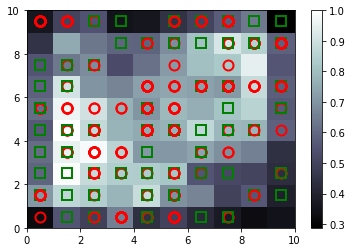

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15671769
15728010
15689268
15785705
15706394
15686461
15680643
15668830
15712877
15573520
15686885
15585928
15680895
15583067
15623072
15647898
15679801
15587038
15592773
15588854


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [9]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [12]:
import tensorflow as tf
tf.__version__

'2.9.2'

## Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [17]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.3496 - accuracy: 0.9710
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9710
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1488 - accuracy: 0.9710
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9710
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9710
Epoch 6/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0979 - accuracy: 0.9710
Epoch 7/10
690/690 [==============================] - 3s 4ms/step - loss: 0.0917 - accuracy: 0.9710
Epoch 8/10
690/690 [==============================] - 3s 4ms/step - loss: 0.0862 - accuracy: 0.9710
Epoch 9/10
690/690 [==============================] - 3s 4ms/step - loss: 0.0812 - accuracy: 0.9710
Epoch 10/10
690/690 [==============================] - 3s 4ms/step - loss: 0.0772 - accuracy: 0.9710

## Predicting test set results

In [18]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 1s 6ms/step


In [19]:
print(y_pred)

[[1.57901130e+07 1.16535102e-12]
 [1.55988020e+07 2.59484989e-09]
 [1.57627160e+07 3.33158539e-07]
 ...
 [1.57128770e+07 2.48633593e-01]
 [1.57280100e+07 2.48633593e-01]
 [1.57225350e+07 2.48633593e-01]]
